In [1]:
import tensorflow as tf

In [2]:
x = tf.Variable([[25,2,5]])

In [3]:
x.shape

TensorShape([1, 3])

In [4]:
x

<tf.Variable 'Variable:0' shape=(1, 3) dtype=int32, numpy=array([[25,  2,  5]], dtype=int32)>

In [5]:
x_T = tf.transpose(x)

In [6]:
x_T.shape

TensorShape([3, 1])

In [7]:
tf.matmul(x, x_T)

<tf.Tensor: shape=(1, 1), dtype=int32, numpy=array([[654]], dtype=int32)>

In [8]:
import matplotlib.pyplot as plt
import numpy as np

In [9]:
v = tf.Variable([[3,1]])

In [10]:
def plot_vectors(vectors, colors):
  plt.figure()
  plt.axvline(x=0, color='lightgray')
  plt.axhline(y=0, color='lightgray')
  for i in range(len(vectors)):
    x = tf.concat([[0,0], vectors[i]],0)
    plt.quiver([x[0]], [x[1]], [x[2]], [x[3]],
               angles='xy', scale_units='xy', scale=1, color=colors[i],)

(-1.0, 5.0)

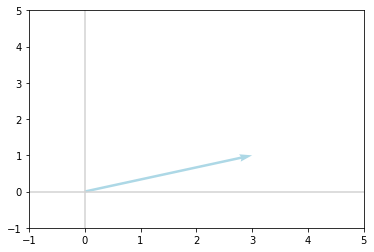

In [11]:
plot_vectors([tf.squeeze(v)],['lightblue'])
plt.xlim(-1,5)
plt.ylim(-1,5)

In [12]:
I = tf.Variable([[1,0],[0,1]])

In [13]:
I

<tf.Variable 'Variable:0' shape=(2, 2) dtype=int32, numpy=
array([[1, 0],
       [0, 1]], dtype=int32)>

In [14]:
Iv = tf.linalg.matvec(I,v)

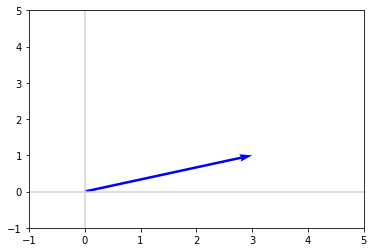

In [15]:
plot_vectors([tf.squeeze(Iv)], ['blue'])
plt.xlim(-1,5)
_ = plt.ylim(-1,5)

In [16]:
E = tf.Variable([[1,0],[0,-1]])

In [17]:
Ev = tf.linalg.matvec(E,v)

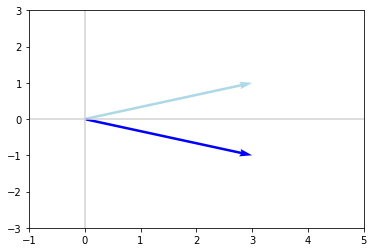

In [18]:
plot_vectors([tf.squeeze(v), tf.squeeze(Ev)], ['lightblue', 'blue'])
plt.xlim(-1,5)
_ = plt.ylim(-3,3)

In [19]:
F = tf.Variable([[-1,0],[0,1]])

In [20]:
Fv = tf.linalg.matvec(F, v)

(-1.0, 5.0)

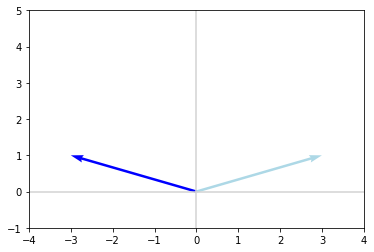

In [21]:
plot_vectors([tf.squeeze(v), tf.squeeze(Fv)], ['lightblue', 'blue'])
plt.xlim(-4,4)
plt.ylim(-1,5)

In [22]:
A = tf.Variable([[-1,4],[2,-2]])

In [23]:
Av =tf.linalg.matvec(A,v)

(-1.0, 5.0)

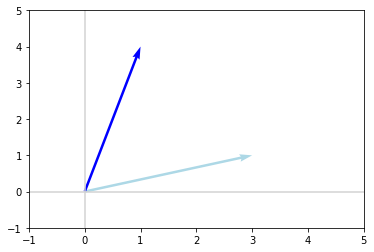

In [24]:
plot_vectors([tf.squeeze(v), tf.squeeze(Av)], ['lightblue', 'blue'])
plt.xlim(-1,5)
plt.ylim(-1,5)

(-1.0, 5.0)

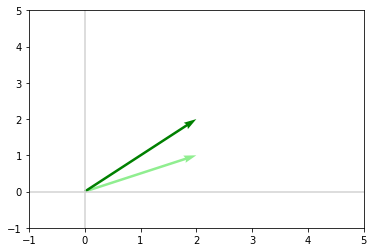

In [25]:
v2 = tf.Variable([[2,1]])
plot_vectors([tf.squeeze(v2), tf.linalg.matvec(A, tf.squeeze(v2))],['lightgreen', 'green'])
plt.xlim(-1,5)
plt.ylim(-1,5)

In [26]:
v3 = tf.Variable([[-3,-1]])
v4 = tf.Variable([[-1,1]])

In [27]:
V = tf.concat([tf.transpose(v),
               tf.transpose(v2),
               tf.transpose(v3),
               tf.transpose(v4)], axis=1)

In [28]:
V

<tf.Tensor: shape=(2, 4), dtype=int32, numpy=
array([[ 3,  2, -3, -1],
       [ 1,  1, -1,  1]], dtype=int32)>

In [29]:
IV  = I @ V

In [30]:
IV

<tf.Tensor: shape=(2, 4), dtype=int32, numpy=
array([[ 3,  2, -3, -1],
       [ 1,  1, -1,  1]], dtype=int32)>

In [31]:
AV = A @ V
AV

<tf.Tensor: shape=(2, 4), dtype=int32, numpy=
array([[ 1,  2, -1,  5],
       [ 4,  2, -4, -4]], dtype=int32)>

In [32]:
def vectorfy(mtrx, clmn):
  return tf.reshape(tf.Variable(mtrx[:, clmn]), -1)

In [33]:
vectorfy(V, 0)

<tf.Tensor: shape=(2,), dtype=int32, numpy=array([3, 1], dtype=int32)>

In [34]:
vectorfy(V, 0) == v

<tf.Tensor: shape=(1, 2), dtype=bool, numpy=array([[ True,  True]])>

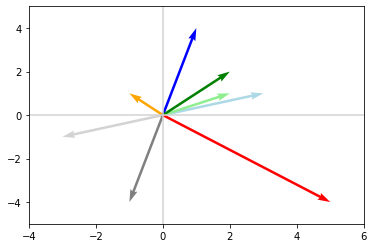

In [35]:
plot_vectors([vectorfy(V,0), vectorfy(V,1),vectorfy(V,2),vectorfy(V,3),
              vectorfy(AV,0), vectorfy(AV,1),vectorfy(AV,2),vectorfy(AV,3)],
             ['lightblue','lightgreen', 'lightgray', 'orange',
              'blue', 'green', 'gray', 'red'])
plt.xlim(-4,6)
_ = plt.ylim(-5,5)

In [36]:
A =tf.cast(A, tf.float32)

In [37]:
lambdas, V = tf.linalg.eig(A)

In [38]:
lambdas = tf.cast(lambdas, tf.float32)

In [39]:
V = tf.cast(V, tf.float32)
V

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[ 0.86011124, -0.7645476 ],
       [ 0.5101065 ,  0.6445674 ]], dtype=float32)>

In [40]:
v = V[:,0]
v1 = V[:,1]

In [41]:
lambduh = lambdas[0]
lambduh

lambduh2 = lambdas[1]
lambduh2


<tf.Tensor: shape=(), dtype=float32, numpy=-4.372281>

In [42]:
Av = tf.linalg.matvec(A,v)
Av1 = tf.linalg.matvec(A,v1)

In [43]:
Av, Av1

(<tf.Tensor: shape=(2,), dtype=float32, numpy=array([1.1803148 , 0.70000947], dtype=float32)>,
 <tf.Tensor: shape=(2,), dtype=float32, numpy=array([ 3.342817, -2.81823 ], dtype=float32)>)

In [44]:
lambduh * v

<tf.Tensor: shape=(2,), dtype=float32, numpy=array([1.1803145 , 0.70000964], dtype=float32)>

In [45]:
lambduh2 * v1

<tf.Tensor: shape=(2,), dtype=float32, numpy=array([ 3.3428168, -2.8182297], dtype=float32)>

(-1.0, 2.0)

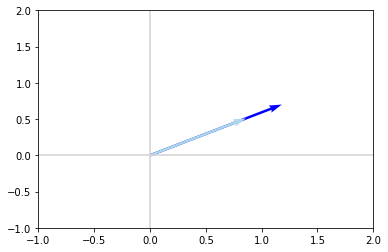

In [46]:
plot_vectors([Av, v], ['blue', 'lightblue'])
plt.xlim(-1,2)
plt.ylim(-1,2)

(-1.0, 2.0)

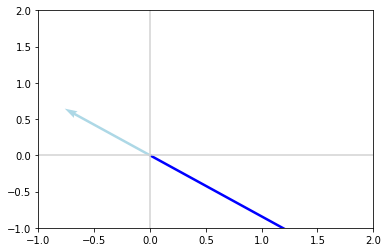

In [47]:
plot_vectors([Av1, v1], ['blue', 'lightblue'])
plt.xlim(-1,2)
plt.ylim(-1,2)

In [48]:
X = tf.Variable([[25,2,9],[5,26,-5],[3,7,-1.]])
X

<tf.Variable 'Variable:0' shape=(3, 3) dtype=float32, numpy=
array([[25.,  2.,  9.],
       [ 5., 26., -5.],
       [ 3.,  7., -1.]], dtype=float32)>

In [49]:
lambdas_X, V_X = tf.linalg.eig(X)

In [50]:
lambdas_X = tf.cast(lambdas_X, tf.float32)

In [51]:
V_X = tf.cast(V_X, tf.float32)

In [52]:
v_X = V_X[:, 0]
v_X

<tf.Tensor: shape=(3,), dtype=float32, numpy=array([ 0.34220472, -0.23789713, -0.9090109 ], dtype=float32)>

In [53]:
lambda_X = lambdas_X[0] 
lambda_X

<tf.Tensor: shape=(), dtype=float32, numpy=-0.2974063>

In [54]:
tf.linalg.matvec(X, v_X)

<tf.Tensor: shape=(3,), dtype=float32, numpy=array([-0.10177422,  0.0707531 ,  0.2703452 ], dtype=float32)>

In [55]:
lambda_X * v_X

<tf.Tensor: shape=(3,), dtype=float32, numpy=array([-0.10177384,  0.0707521 ,  0.27034554], dtype=float32)>

In [56]:
X = tf.Variable([[4,2],[-5,-3.]])
X

<tf.Variable 'Variable:0' shape=(2, 2) dtype=float32, numpy=
array([[ 4.,  2.],
       [-5., -3.]], dtype=float32)>

In [57]:
tf.linalg.det(X)

<tf.Tensor: shape=(), dtype=float32, numpy=-2.0000005>

In [58]:
X = tf.Variable([[1,2,4],[2,-1,3],[0,5,1.]])

In [59]:
tf.linalg.det(X)

<tf.Tensor: shape=(), dtype=float32, numpy=20.0>

In [60]:
B = tf.Variable([[1,0],[0,1.]])

(-1.0, 3.0)

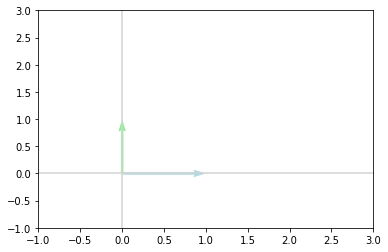

In [61]:
plot_vectors([vectorfy(B,0), vectorfy(B,1)],
             ['lightblue', 'lightgreen'])
plt.xlim(-1,3)
plt.ylim(-1,3)

In [62]:
N = tf.Variable([[-4,1],[-8,2.]])

In [63]:
tf.linalg.det(N)

<tf.Tensor: shape=(), dtype=float32, numpy=0.0>

In [64]:
NB = N @ B
NB

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[-4.,  1.],
       [-8.,  2.]], dtype=float32)>

(-9.0, 3.0)

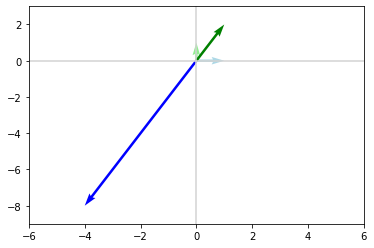

In [65]:
plot_vectors([vectorfy(B,0), vectorfy(B,1), vectorfy(NB, 0), vectorfy(NB, 1)],
             ['lightblue', 'lightgreen', 'blue', 'green'])
plt.xlim(-6,6)
plt.ylim(-9,3)

In [66]:
lambdas, V  = tf.linalg.eig(N)
lambdas

<tf.Tensor: shape=(2,), dtype=complex64, numpy=array([ 0.+0.j, -2.+0.j], dtype=complex64)>

In [67]:
I

<tf.Variable 'Variable:0' shape=(2, 2) dtype=int32, numpy=
array([[1, 0],
       [0, 1]], dtype=int32)>

In [68]:
B

<tf.Variable 'Variable:0' shape=(2, 2) dtype=float32, numpy=
array([[1., 0.],
       [0., 1.]], dtype=float32)>

In [69]:
IB = tf.cast(I, tf.float32) @ B

(-1.0, 3.0)

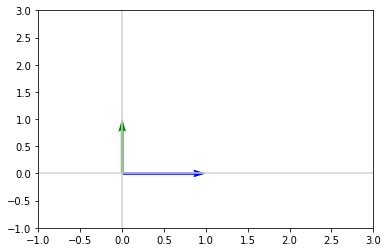

In [70]:
plot_vectors([vectorfy(B, 0), vectorfy(B, 1), vectorfy(IB, 0), vectorfy(IB,1)],
             ['lightblue','lightgreen', 'blue', 'green'])
plt.xlim(-1,3)
plt.ylim(-1,3)

In [71]:
lambdas, V = tf.linalg.eig(tf.cast(I, tf.float32))
lambdas

<tf.Tensor: shape=(2,), dtype=complex64, numpy=array([1.+0.j, 1.+0.j], dtype=complex64)>

In [72]:
J = tf.Variable([[-0.5,0], [0,2]])
J

<tf.Variable 'Variable:0' shape=(2, 2) dtype=float32, numpy=
array([[-0.5,  0. ],
       [ 0. ,  2. ]], dtype=float32)>

In [73]:
tf.linalg.det(J)

<tf.Tensor: shape=(), dtype=float32, numpy=-1.0>

In [74]:
tf.abs(tf.linalg.det(J))

<tf.Tensor: shape=(), dtype=float32, numpy=1.0>

In [75]:
JB = J @ B

(-1.0, 3.0)

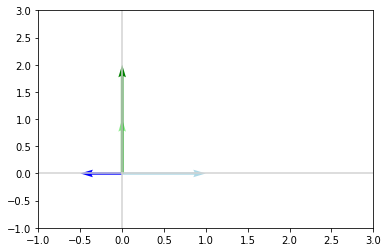

In [76]:
plot_vectors([vectorfy(B, 0), vectorfy(B,1), vectorfy(JB,0), vectorfy(JB,1)],
             ['lightblue','lightgreen', 'blue', 'green'])
plt.xlim(-1,3)
plt.ylim(-1,3)

In [77]:
lambdas, V = tf.linalg.eig(J)
lambdas

<tf.Tensor: shape=(2,), dtype=complex64, numpy=array([-0.5+0.j,  2. +0.j], dtype=complex64)>

In [78]:
D = I * 2
D

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[2, 0],
       [0, 2]], dtype=int32)>

In [79]:
tf.linalg.det(tf.cast(D, tf.float32))

<tf.Tensor: shape=(), dtype=float32, numpy=4.0>

In [80]:
DB = tf.cast(D, tf.float32) @ B

(-1.0, 3.0)

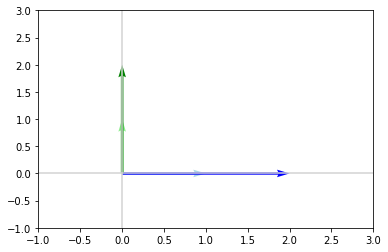

In [81]:
plot_vectors([vectorfy(B,0), vectorfy(B,1), vectorfy(DB,0), vectorfy(DB,1)],
             ['lightblue','lightgreen','blue','green'])
plt.xlim(-1,3)
plt.ylim(-1,3)

In [82]:
lambdas, V = tf.linalg.eig(tf.cast(D,tf.float32))
lambdas

<tf.Tensor: shape=(2,), dtype=complex64, numpy=array([2.+0.j, 2.+0.j], dtype=complex64)>

Eigendecomposition


In [83]:
A = tf.Variable([[4,2],[-5,-3.]])

In [84]:
lambdas, V = tf.linalg.eig(A)
lambdas

<tf.Tensor: shape=(2,), dtype=complex64, numpy=array([-1.0000004+0.j,  2.0000005+0.j], dtype=complex64)>

In [85]:
V

<tf.Tensor: shape=(2, 2), dtype=complex64, numpy=
array([[-0.37139058+0.j,  0.7071068 +0.j],
       [ 0.9284767 +0.j, -0.70710677+0.j]], dtype=complex64)>

In [86]:
Vinv = tf.linalg.inv(V)
Vinv

<tf.Tensor: shape=(2, 2), dtype=complex64, numpy=
array([[1.7950542 +0.j, 1.7950544 +0.j],
       [2.3570218 +0.j, 0.94280845+0.j]], dtype=complex64)>

In [87]:
Lambda = tf.linalg.diag(lambdas)
Lambda

<tf.Tensor: shape=(2, 2), dtype=complex64, numpy=
array([[-1.0000004+0.j,  0.       +0.j],
       [ 0.       +0.j,  2.0000005+0.j]], dtype=complex64)>

In [88]:
V @ (Lambda @ Vinv)

<tf.Tensor: shape=(2, 2), dtype=complex64, numpy=
array([[ 3.9999995+0.j,  1.9999994+0.j],
       [-4.999999 +0.j, -2.9999995+0.j]], dtype=complex64)>

In [89]:
A = tf.Variable([[2,1],[1,2.]])
A

<tf.Variable 'Variable:0' shape=(2, 2) dtype=float32, numpy=
array([[2., 1.],
       [1., 2.]], dtype=float32)>

In [90]:
lambdas, Q = tf.linalg.eig(A)
lambdas

<tf.Tensor: shape=(2,), dtype=complex64, numpy=array([1.+0.j, 3.+0.j], dtype=complex64)>

In [91]:
Lambda = tf.linalg.diag(lambdas)
Lambda

<tf.Tensor: shape=(2, 2), dtype=complex64, numpy=
array([[1.+0.j, 0.+0.j],
       [0.+0.j, 3.+0.j]], dtype=complex64)>

In [92]:
Q

<tf.Tensor: shape=(2, 2), dtype=complex64, numpy=
array([[-0.7071069 +0.j,  0.70710677+0.j],
       [ 0.7071067 +0.j,  0.7071068 +0.j]], dtype=complex64)>

In [93]:
Q @ (Lambda @ tf.transpose(Q))

<tf.Tensor: shape=(2, 2), dtype=complex64, numpy=
array([[2.       +0.j, 1.0000001+0.j],
       [1.       +0.j, 2.0000002+0.j]], dtype=complex64)>

In [94]:
P = tf.Variable([[25,2,-5],[3,-2,1],[5,7,4.]])
P

<tf.Variable 'Variable:0' shape=(3, 3) dtype=float32, numpy=
array([[25.,  2., -5.],
       [ 3., -2.,  1.],
       [ 5.,  7.,  4.]], dtype=float32)>

In [95]:
lambdas, V = tf.linalg.eig(P)
lambdas 

<tf.Tensor: shape=(3,), dtype=complex64, numpy=array([-3.4328187+0.j,  6.6683817+0.j, 23.764435 +0.j], dtype=complex64)>

In [96]:
Vinv = tf.linalg.inv(V)
Vinv

<tf.Tensor: shape=(3, 3), dtype=complex64, numpy=
array([[-0.08171714+0.j,  1.1164405 +0.j, -0.20517465+0.j],
       [-0.3914278 +0.j,  0.7198148 +0.j,  1.003212  +0.j],
       [ 1.1356099 +0.j,  0.01024065+0.j, -0.2867679 +0.j]],
      dtype=complex64)>

In [97]:
Lambdas = tf.linalg.diag(lambdas)

In [98]:
V @ (Lambdas @ Vinv)

<tf.Tensor: shape=(3, 3), dtype=complex64, numpy=
array([[25.       +0.j,  2.0000002+0.j, -4.9999976+0.j],
       [ 3.       +0.j, -1.9999999+0.j,  1.       +0.j],
       [ 5.       +0.j,  7.0000005+0.j,  3.9999998+0.j]], dtype=complex64)>

In [99]:
S = tf.Variable([[25,2,-5],[2,-2,1],[-5,1,4.]])
S

<tf.Variable 'Variable:0' shape=(3, 3) dtype=float32, numpy=
array([[25.,  2., -5.],
       [ 2., -2.,  1.],
       [-5.,  1.,  4.]], dtype=float32)>

In [100]:
lambdas, Q = tf.linalg.eig(S)

In [101]:
Lambdas = tf.linalg.diag(lambdas)

In [102]:
Q @ Lambdas @ tf.transpose(Q)

<tf.Tensor: shape=(3, 3), dtype=complex64, numpy=
array([[24.999998  +0.j,  2.0000002 +0.j, -5.        +0.j],
       [ 2.        +0.j, -1.9999999 +0.j,  0.9999998 +0.j],
       [-5.        +0.j,  0.99999976+0.j,  4.        +0.j]],
      dtype=complex64)>

In [103]:
A = tf.Variable([[-1,2],[3,-2],[5,7.]])
A

<tf.Variable 'Variable:0' shape=(3, 2) dtype=float32, numpy=
array([[-1.,  2.],
       [ 3., -2.],
       [ 5.,  7.]], dtype=float32)>

In [104]:
d, U, VT = tf.linalg.svd(A, True)

In [105]:
U, d, VT

(<tf.Tensor: shape=(3, 3), dtype=float32, numpy=
 array([[ 0.12708327, -0.47409505, -0.87125427],
        [ 0.00164604,  0.8784756 , -0.47778445],
        [ 0.9918907 ,  0.05928418,  0.11241978]], dtype=float32)>,
 <tf.Tensor: shape=(2,), dtype=float32, numpy=array([8.669184, 4.104295], dtype=float32)>,
 <tf.Tensor: shape=(2, 2), dtype=float32, numpy=
 array([[ 0.5579889,  0.8298484],
        [ 0.8298484, -0.5579889]], dtype=float32)>)

In [106]:
tf.linalg.diag(d)

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[8.669184, 0.      ],
       [0.      , 4.104295]], dtype=float32)>

In [107]:
D = tf.concat((tf.linalg.diag(d), [[0,0]]), axis=0)
D

<tf.Tensor: shape=(3, 2), dtype=float32, numpy=
array([[8.669184, 0.      ],
       [0.      , 4.104295],
       [0.      , 0.      ]], dtype=float32)>

In [108]:
U.shape, D.shape, VT.shape

(TensorShape([3, 3]), TensorShape([3, 2]), TensorShape([2, 2]))

In [109]:
U @ D @ VT

<tf.Tensor: shape=(3, 2), dtype=float32, numpy=
array([[-0.9999996,  2.       ],
       [ 3.       , -2.       ],
       [ 4.9999995,  6.999999 ]], dtype=float32)>

In [110]:
lambdas, V = tf.linalg.eig(A @ tf.transpose(A))
lambdas

<tf.Tensor: shape=(3,), dtype=complex64, numpy=
array([2.3685737e-07+0.j, 1.6845245e+01+0.j, 7.5154739e+01+0.j],
      dtype=complex64)>

In [111]:
V

<tf.Tensor: shape=(3, 3), dtype=complex64, numpy=
array([[ 0.87125415+0.j,  0.4740952 +0.j,  0.12708326+0.j],
       [ 0.47778448+0.j, -0.8784754 +0.j,  0.0016462 +0.j],
       [-0.11241987+0.j, -0.05928428+0.j,  0.9918907 +0.j]],
      dtype=complex64)>

In [112]:
U

<tf.Tensor: shape=(3, 3), dtype=float32, numpy=
array([[ 0.12708327, -0.47409505, -0.87125427],
       [ 0.00164604,  0.8784756 , -0.47778445],
       [ 0.9918907 ,  0.05928418,  0.11241978]], dtype=float32)>

In [113]:
U = tf.reverse(U, [-1])

In [114]:
tf.cast(V, tf.float32)==U

<tf.Tensor: shape=(3, 3), dtype=bool, numpy=
array([[False, False, False],
       [False, False, False],
       [False, False,  True]])>

In [115]:
lambdas, V = tf.linalg.eig(tf.transpose(A) @ A)
lambdas

<tf.Tensor: shape=(2,), dtype=complex64, numpy=array([16.845242+0.j, 75.154755+0.j], dtype=complex64)>

In [116]:
V

<tf.Tensor: shape=(2, 2), dtype=complex64, numpy=
array([[-0.8298484 +0.j, -0.5579889 +0.j],
       [ 0.5579889 +0.j, -0.82984847+0.j]], dtype=complex64)>

In [117]:
VT

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[ 0.5579889,  0.8298484],
       [ 0.8298484, -0.5579889]], dtype=float32)>

In [118]:
from PIL import Image

In [119]:
!wget https://cdn.britannica.com/92/197192-050-D4F4F166/Petro-Poroshenko-2016.jpg

--2023-01-03 20:24:54--  https://cdn.britannica.com/92/197192-050-D4F4F166/Petro-Poroshenko-2016.jpg
Resolving cdn.britannica.com (cdn.britannica.com)... 52.85.132.43, 52.85.132.118, 52.85.132.51, ...
Connecting to cdn.britannica.com (cdn.britannica.com)|52.85.132.43|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 271408 (265K) [image/jpeg]
Saving to: ‘Petro-Poroshenko-2016.jpg’

Petro-Poroshenko-20 100%[===================>] 265.05K  --.-KB/s    in 0.006s  

2023-01-03 20:24:54 (42.5 MB/s) - ‘Petro-Poroshenko-2016.jpg’ saved [271408/271408]



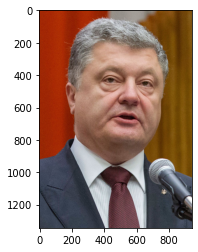

In [120]:
img = Image.open('/content/Petro-Poroshenko-2016.jpg')
_ = plt.imshow(img)

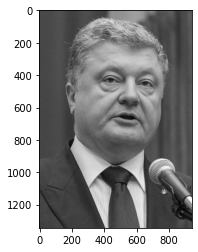

In [121]:
imggray = img.convert('LA')
_= plt.imshow(imggray)

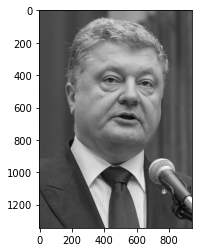

In [122]:
imgmat = np.array(list(imggray.getdata(band=0)), float)
imgmat.shape = (imggray.size[1], imggray.size[0])
imgmat = np.matrix(imgmat)
_ = plt.imshow(imgmat, cmap='gray')

In [123]:
imgmat = tf.convert_to_tensor(imgmat)

In [124]:
sigma, U, V = tf.linalg.svd(imgmat, True)

sigma = tf.cast(sigma, tf.float32)
U = tf.cast(U, tf.float32)
V = tf.cast(V, tf.float32)

In [125]:
U, sigma, V = np.linalg.svd(imgmat)
sigma, U, V

(array([1.22112854e+05, 1.98539676e+04, 1.89536929e+04, 1.30662598e+04,
        1.06971790e+04, 9.59563521e+03, 9.05389013e+03, 7.83588576e+03,
        6.94254553e+03, 6.18579703e+03, 5.53342219e+03, 5.02472969e+03,
        4.52780116e+03, 4.32967681e+03, 3.99955605e+03, 3.85719398e+03,
        3.50141271e+03, 3.32099524e+03, 3.16046615e+03, 3.00996665e+03,
        2.92443463e+03, 2.79013961e+03, 2.70067481e+03, 2.55701131e+03,
        2.43633420e+03, 2.30050059e+03, 2.25087491e+03, 2.17925633e+03,
        2.10145265e+03, 2.05277965e+03, 2.01666939e+03, 1.97775392e+03,
        1.92186791e+03, 1.87823278e+03, 1.84592033e+03, 1.81146861e+03,
        1.78754067e+03, 1.72505135e+03, 1.69272771e+03, 1.64632440e+03,
        1.60747409e+03, 1.57165336e+03, 1.55750015e+03, 1.55345779e+03,
        1.49316981e+03, 1.47148249e+03, 1.45307620e+03, 1.43470249e+03,
        1.42220907e+03, 1.41334086e+03, 1.40435321e+03, 1.38815644e+03,
        1.36745969e+03, 1.34858051e+03, 1.34202758e+03, 1.336858

In [126]:
sigma, U, V

(array([1.22112854e+05, 1.98539676e+04, 1.89536929e+04, 1.30662598e+04,
        1.06971790e+04, 9.59563521e+03, 9.05389013e+03, 7.83588576e+03,
        6.94254553e+03, 6.18579703e+03, 5.53342219e+03, 5.02472969e+03,
        4.52780116e+03, 4.32967681e+03, 3.99955605e+03, 3.85719398e+03,
        3.50141271e+03, 3.32099524e+03, 3.16046615e+03, 3.00996665e+03,
        2.92443463e+03, 2.79013961e+03, 2.70067481e+03, 2.55701131e+03,
        2.43633420e+03, 2.30050059e+03, 2.25087491e+03, 2.17925633e+03,
        2.10145265e+03, 2.05277965e+03, 2.01666939e+03, 1.97775392e+03,
        1.92186791e+03, 1.87823278e+03, 1.84592033e+03, 1.81146861e+03,
        1.78754067e+03, 1.72505135e+03, 1.69272771e+03, 1.64632440e+03,
        1.60747409e+03, 1.57165336e+03, 1.55750015e+03, 1.55345779e+03,
        1.49316981e+03, 1.47148249e+03, 1.45307620e+03, 1.43470249e+03,
        1.42220907e+03, 1.41334086e+03, 1.40435321e+03, 1.38815644e+03,
        1.36745969e+03, 1.34858051e+03, 1.34202758e+03, 1.336858

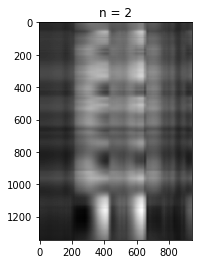

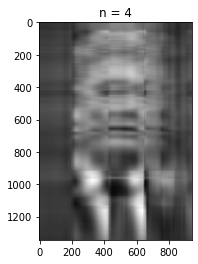

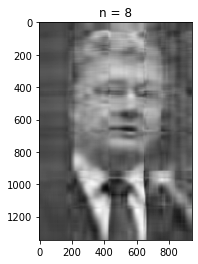

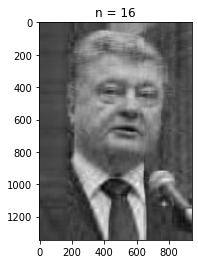

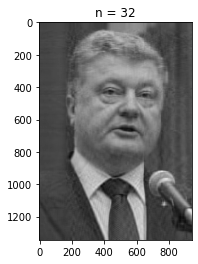

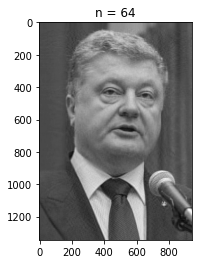

In [127]:
for i in [2, 4, 8, 16, 32, 64]:
    reconstimg = np.matrix(U[:, :i]) * np.diag(sigma[:i]) * np.matrix(V[:i, :])
    plt.imshow(reconstimg, cmap='gray')
    title = "n = %s" % i
    plt.title(title)
    plt.show()

In [128]:
A

<tf.Variable 'Variable:0' shape=(3, 2) dtype=float32, numpy=
array([[-1.,  2.],
       [ 3., -2.],
       [ 5.,  7.]], dtype=float32)>

In [129]:
d, U, VT = tf.linalg.svd(A, True)

In [130]:
U

<tf.Tensor: shape=(3, 3), dtype=float32, numpy=
array([[ 0.12708327, -0.47409505, -0.87125427],
       [ 0.00164604,  0.8784756 , -0.47778445],
       [ 0.9918907 ,  0.05928418,  0.11241978]], dtype=float32)>

In [131]:
VT

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[ 0.5579889,  0.8298484],
       [ 0.8298484, -0.5579889]], dtype=float32)>

In [132]:
d

<tf.Tensor: shape=(2,), dtype=float32, numpy=array([8.669184, 4.104295], dtype=float32)>

In [133]:
D = tf.linalg.diag(d)
D

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[8.669184, 0.      ],
       [0.      , 4.104295]], dtype=float32)>

In [134]:
1/D[0,0]

<tf.Tensor: shape=(), dtype=float32, numpy=0.11535111>

In [135]:
1/D[1,1]

<tf.Tensor: shape=(), dtype=float32, numpy=0.24364722>

In [136]:
Dinv = tf.linalg.inv(D)
Dinv

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[0.11535111, 0.        ],
       [0.        , 0.24364722]], dtype=float32)>

In [137]:
Dplus = tf.concat((Dinv, tf.transpose([[0,0.]])), axis=-1)
Dplus

<tf.Tensor: shape=(2, 3), dtype=float32, numpy=
array([[0.11535111, 0.        , 0.        ],
       [0.        , 0.24364722, 0.        ]], dtype=float32)>

In [138]:
tf.transpose(VT) @ Dplus @ tf.transpose(U)

<tf.Tensor: shape=(2, 3), dtype=float32, numpy=
array([[-0.08767773,  0.17772515,  0.07582936],
       [ 0.07661929, -0.11927334,  0.08688785]], dtype=float32)>

In [139]:
tf.linalg.pinv(A)

<tf.Tensor: shape=(2, 3), dtype=float32, numpy=
array([[-0.08767772,  0.17772515,  0.07582937],
       [ 0.07661929, -0.11927334,  0.08688786]], dtype=float32)>

In [140]:
A_p =  tf.Variable([[-1,2],[3,-2],[5,7.]])
A_p

<tf.Variable 'Variable:0' shape=(3, 2) dtype=float32, numpy=
array([[-1.,  2.],
       [ 3., -2.],
       [ 5.,  7.]], dtype=float32)>

In [141]:
d, U, VT = tf.linalg.svd(A_p, True)

In [142]:
d, U, VT

(<tf.Tensor: shape=(2,), dtype=float32, numpy=array([8.669184, 4.104295], dtype=float32)>,
 <tf.Tensor: shape=(3, 3), dtype=float32, numpy=
 array([[ 0.12708327, -0.47409505, -0.87125427],
        [ 0.00164604,  0.8784756 , -0.47778445],
        [ 0.9918907 ,  0.05928418,  0.11241978]], dtype=float32)>,
 <tf.Tensor: shape=(2, 2), dtype=float32, numpy=
 array([[ 0.5579889,  0.8298484],
        [ 0.8298484, -0.5579889]], dtype=float32)>)

In [143]:
D = tf.linalg.diag(d)
D

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[8.669184, 0.      ],
       [0.      , 4.104295]], dtype=float32)>

In [144]:
Dinv = tf.linalg.inv(D)

In [145]:
Dplus = tf.concat((Dinv, tf.transpose([[0,0.]])), axis=1)
Dplus

<tf.Tensor: shape=(2, 3), dtype=float32, numpy=
array([[0.11535111, 0.        , 0.        ],
       [0.        , 0.24364722, 0.        ]], dtype=float32)>

In [146]:
U

<tf.Tensor: shape=(3, 3), dtype=float32, numpy=
array([[ 0.12708327, -0.47409505, -0.87125427],
       [ 0.00164604,  0.8784756 , -0.47778445],
       [ 0.9918907 ,  0.05928418,  0.11241978]], dtype=float32)>

In [147]:
Dplus

<tf.Tensor: shape=(2, 3), dtype=float32, numpy=
array([[0.11535111, 0.        , 0.        ],
       [0.        , 0.24364722, 0.        ]], dtype=float32)>

In [148]:
VT

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[ 0.5579889,  0.8298484],
       [ 0.8298484, -0.5579889]], dtype=float32)>

In [149]:
tf.transpose(VT) @ Dplus @ tf.transpose(U)

<tf.Tensor: shape=(2, 3), dtype=float32, numpy=
array([[-0.08767773,  0.17772515,  0.07582936],
       [ 0.07661929, -0.11927334,  0.08688785]], dtype=float32)>

In [150]:
tf.linalg.pinv(A_p)

<tf.Tensor: shape=(2, 3), dtype=float32, numpy=
array([[-0.08767772,  0.17772515,  0.07582937],
       [ 0.07661929, -0.11927334,  0.08688786]], dtype=float32)>

In [151]:
x1 = tf.Variable([[0,1,2,3,4,5,6,7.]])
y = tf.Variable([[1.85, 1.3, .61, .32, .08, -.66, -1.23, -1.37]])

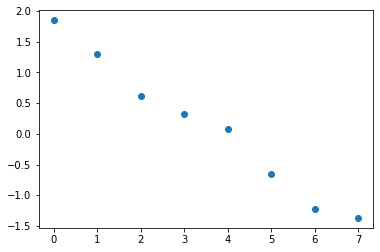

In [152]:
fig, ax = plt.subplots()
_ = ax.scatter(x1,y)

In [153]:
x0 = tf.ones([8,1])
x0

<tf.Tensor: shape=(8, 1), dtype=float32, numpy=
array([[1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.]], dtype=float32)>

In [154]:
X = tf.concat((x0, tf.transpose(x1)), axis=1)
X

<tf.Tensor: shape=(8, 2), dtype=float32, numpy=
array([[1., 0.],
       [1., 1.],
       [1., 2.],
       [1., 3.],
       [1., 4.],
       [1., 5.],
       [1., 6.],
       [1., 7.]], dtype=float32)>

In [155]:
w = tf.linalg.pinv(X) @ tf.transpose(y)
w

<tf.Tensor: shape=(2, 1), dtype=float32, numpy=
array([[ 1.7475001],
       [-0.4671428]], dtype=float32)>

In [156]:
b = tf.Variable(w[0])
b

<tf.Variable 'Variable:0' shape=(1,) dtype=float32, numpy=array([1.7475001], dtype=float32)>

In [157]:
m = tf.Variable(w[1])
m

<tf.Variable 'Variable:0' shape=(1,) dtype=float32, numpy=array([-0.4671428], dtype=float32)>

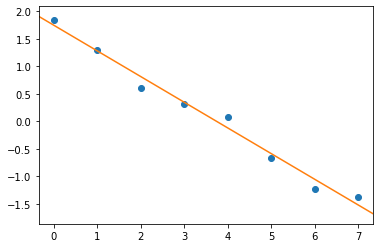

In [158]:
fig, ax  = plt.subplots()
ax.scatter(x1,y)

x_min, x_max =ax.get_xlim()
y_at_xmin = m*x_min + b
y_at_xmax = m*x_max + b

ax.set_xlim([x_min, x_max])
_ = ax.plot([x_min, x_max], [y_at_xmin, y_at_xmax], c='C01')

In [159]:
A = tf.Variable([[25,2],[5,4]])
A

<tf.Variable 'Variable:0' shape=(2, 2) dtype=int32, numpy=
array([[25,  2],
       [ 5,  4]], dtype=int32)>

In [160]:
tf.linalg.trace(A)

<tf.Tensor: shape=(), dtype=int32, numpy=29>

In [161]:
tf.sqrt(tf.linalg.trace(A_p @ tf.transpose(A_p)))

<tf.Tensor: shape=(), dtype=float32, numpy=9.591663>

In [162]:
tf.norm(A_p, ord='fro', axis=(0,1))

<tf.Tensor: shape=(), dtype=float32, numpy=9.591663>

In [163]:
from sklearn import datasets
iris = datasets.load_iris()

In [164]:
iris.data.shape

(150, 4)

In [165]:
iris.get("feature_names")

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [166]:
iris.data[0:6, :]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4]])

In [167]:
from sklearn.decomposition import PCA

In [168]:
pca = PCA(n_components=2)

In [169]:
X = pca.fit_transform(iris.data)

In [170]:
X.shape

(150, 2)

In [171]:
X[0:6,:]

array([[-2.68412563,  0.31939725],
       [-2.71414169, -0.17700123],
       [-2.88899057, -0.14494943],
       [-2.74534286, -0.31829898],
       [-2.72871654,  0.32675451],
       [-2.28085963,  0.74133045]])

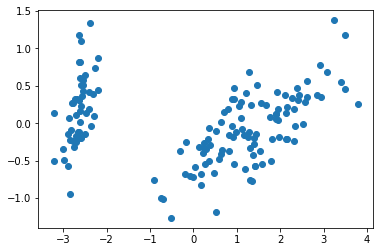

In [172]:
_ = plt.scatter(X[:,0], X[:,1])

In [173]:
iris.target.shape

(150,)

In [174]:
iris.target[0:6]

array([0, 0, 0, 0, 0, 0])

In [175]:
unique_elements, _, count_elements = tf.unique_with_counts(iris.target)


In [176]:
unique_elements, count_elements

(<tf.Tensor: shape=(3,), dtype=int64, numpy=array([0, 1, 2])>,
 <tf.Tensor: shape=(3,), dtype=int32, numpy=array([50, 50, 50], dtype=int32)>)

In [177]:
list(iris.target_names)

['setosa', 'versicolor', 'virginica']

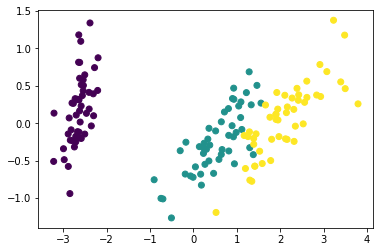

In [178]:
_ = plt.scatter(X[:, 0], X[:,1], c=iris.target)